# Analisis Arbol de Decisiones - TITANIC

### Instalacion de las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Importacion de Data 

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

### Primera acercacion a los datos 


In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


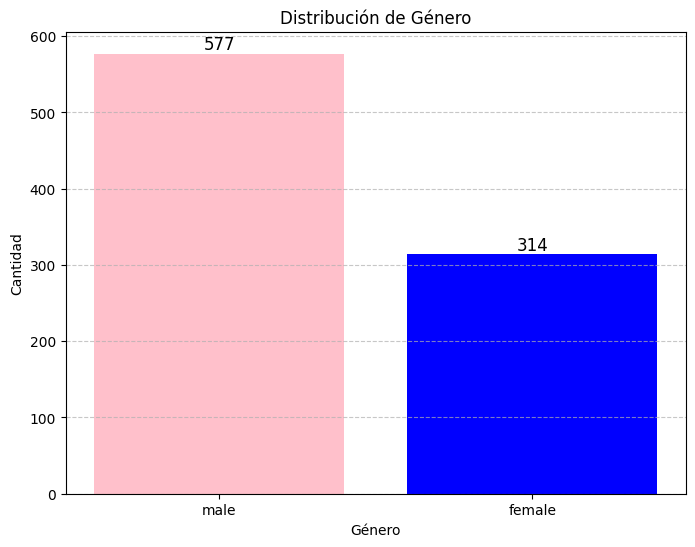

In [5]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
supervivientes = df['Survived'].value_counts()

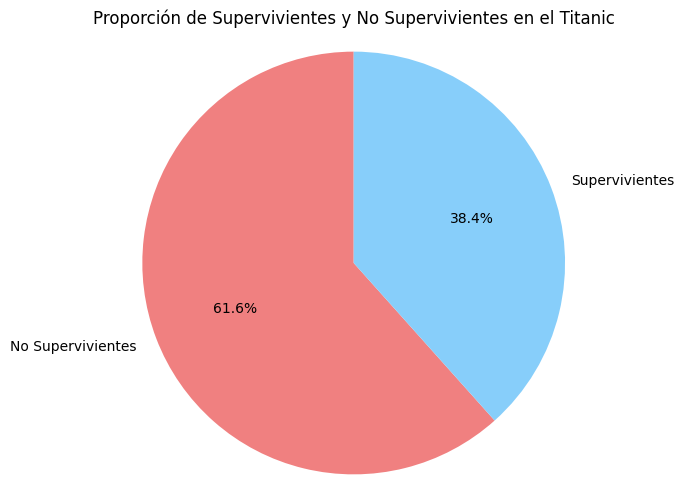

In [7]:
plt.figure(figsize=(6, 6)) 
plt.pie(supervivientes, labels=['No Supervivientes', 'Supervivientes'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proporción de Supervivientes y No Supervivientes en el Titanic') 
plt.axis('equal') 
plt.show()

### Observamos que tenemos problemas de datos vacios en algunas columnnas y por consiguinte lo remplazaremos con datos promedio y con datos default y ademas eliminaremos columnas que no aportan informacion valiosa dentro de nuestro analisis  

### Limpieza de Datos 

In [8]:
df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ticket: ",df['Fare'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Precio de Ticket:  15


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [13]:
df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [16]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
5,0,3,0,28.0,0,0,8.4583,1.0
6,0,1,0,54.0,0,0,51.8625,2.0
7,0,3,0,2.0,3,1,21.0750,2.0
8,1,3,1,27.0,0,2,11.1333,2.0
9,1,2,1,14.0,1,0,30.0708,0.0


In [17]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


## Visualizacion de Distribucion de datos 


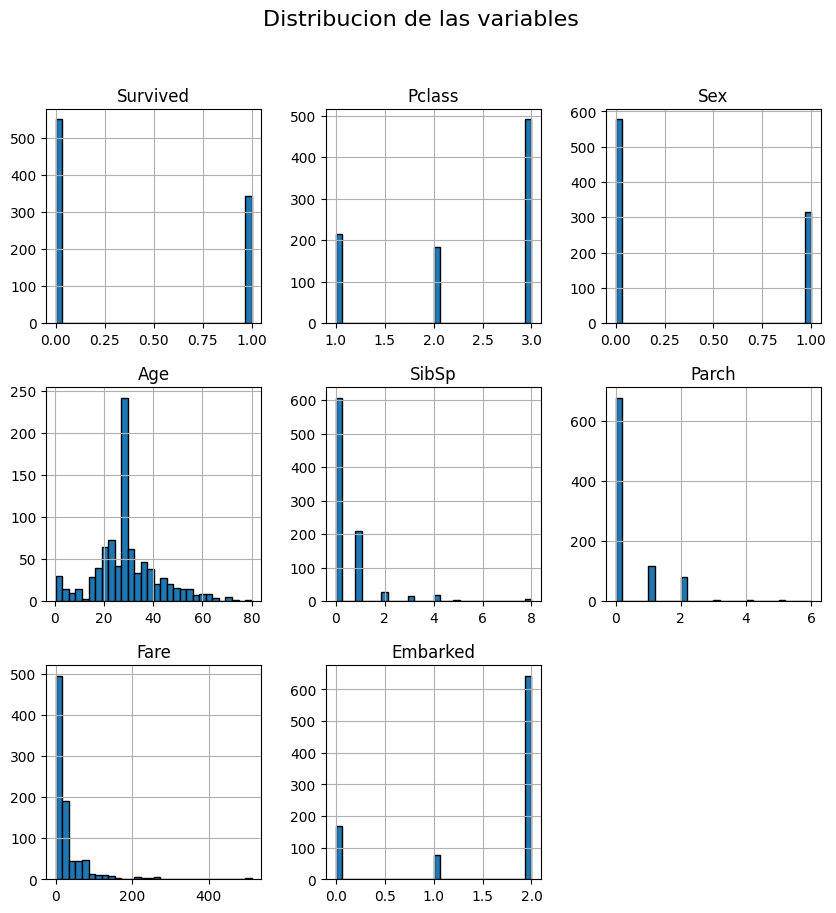

In [19]:
df.hist(figsize=(10,10),bins=30, edgecolor="black")
plt.suptitle("Distribucion de las variables",fontsize=16)
plt.show()

### Podemos observar que la data esta completa y las columnas que no  nos interesan para este analisis fueron eliminadas 

#### Visualizacion de datos atipicos 

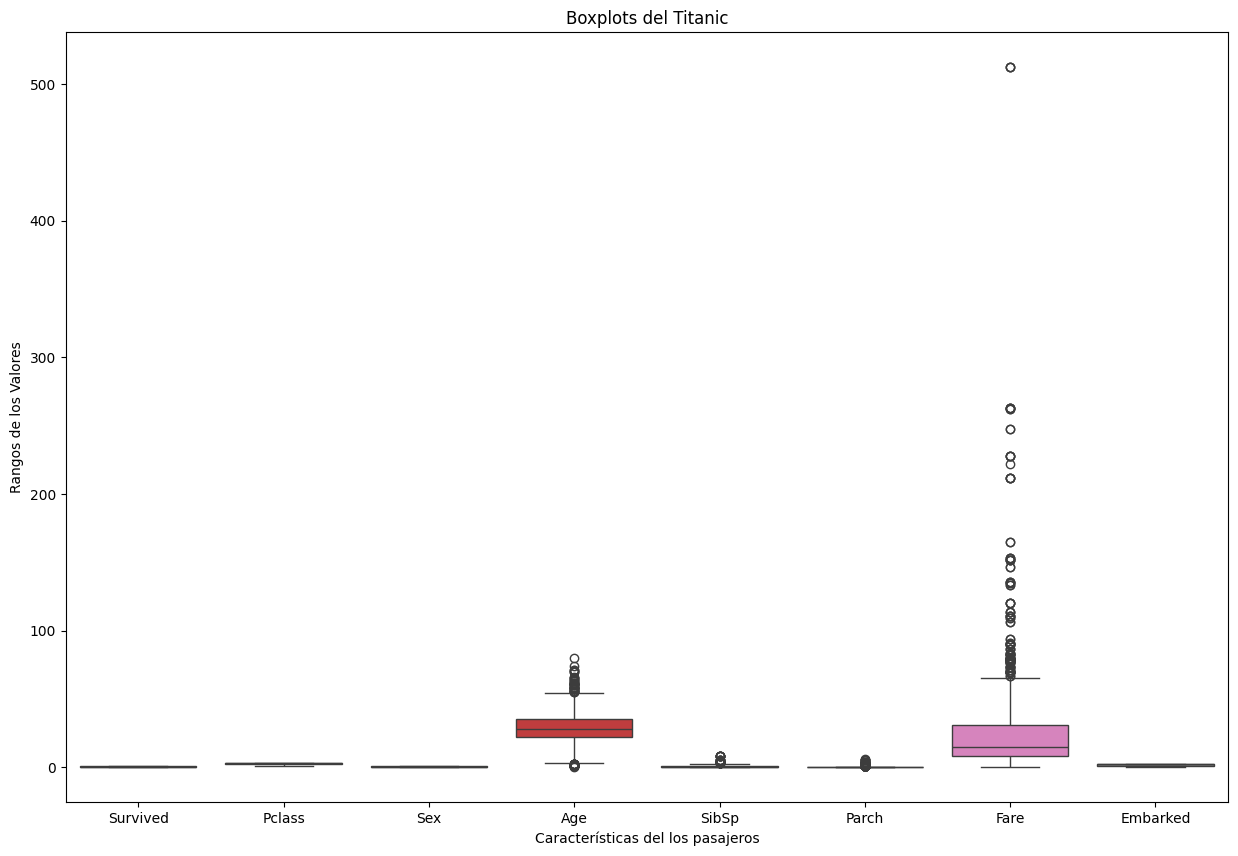

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots del Titanic')
plt.xlabel('Características del los pasajeros')
plt.ylabel('Rangos de los Valores')
plt.show()

#### Observamos que en Fare estan marcados los mas datos atipicos 

## Eliminacion de Datos Atipicos 

In [21]:
q1 = df['Fare'].quantile(0.15)
q3 = df['Fare'].quantile(0.85)


df_filtrada = df[(df['Fare'] >= q1) & (df['Fare'] <= q3)]

print(df_filtrada)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
2           1       3    1  26.0      0      0   7.9250       2.0
3           1       1    1  35.0      1      0  53.1000       2.0
4           0       3    0  35.0      0      0   8.0500       2.0
5           0       3    0  28.0      0      0   8.4583       1.0
6           0       1    0  54.0      0      0  51.8625       2.0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000       2.0
887         1       1    1  19.0      0      0  30.0000       2.0
888         0       3    1  28.0      1      2  23.4500       2.0
889         1       1    0  26.0      0      0  30.0000       0.0
890         0       3    0  32.0      0      0   7.7500       1.0

[656 rows x 8 columns]


In [22]:
df=df_filtrada

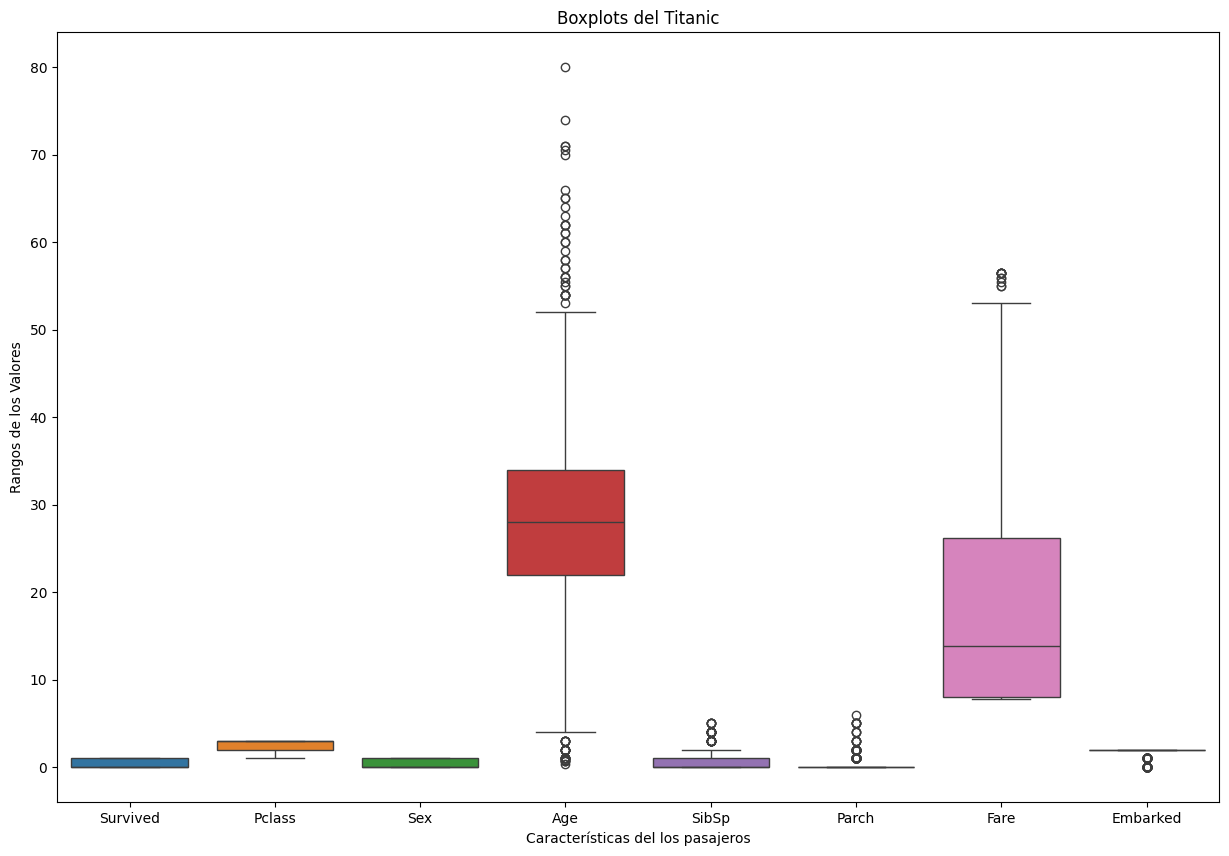

In [23]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots del Titanic')
plt.xlabel('Características del los pasajeros')
plt.ylabel('Rangos de los Valores')
plt.show()

In [24]:
df.head(400
        )

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
5,0,3,0,28.0,0,0,8.4583,1.0
6,0,1,0,54.0,0,0,51.8625,2.0
...,...,...,...,...,...,...,...,...
534,0,3,1,30.0,0,0,8.6625,2.0
535,1,2,1,7.0,0,2,26.2500,2.0
536,0,1,0,45.0,0,0,26.5500,2.0
538,0,3,0,28.0,0,0,14.5000,2.0


In [25]:
df['Age'].fillna(df['Age'].median())

2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 656, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 2 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  656 non-null    int64  
 1   Pclass    656 non-null    int64  
 2   Sex       656 non-null    int64  
 3   Age       656 non-null    float64
 4   SibSp     656 non-null    int64  
 5   Parch     656 non-null    int64  
 6   Fare      656 non-null    float64
 7   Embarked  656 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 46.1 KB


### Representacion grafica despues de la limpeza de datos 

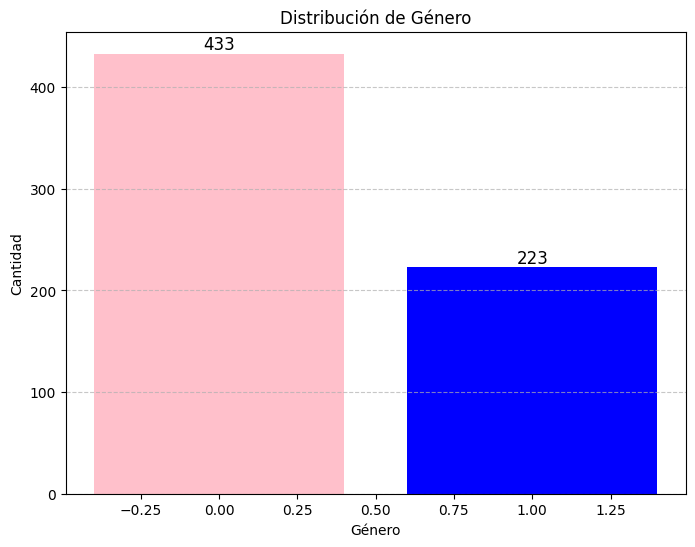

In [27]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Mapa de correlacion de datos 

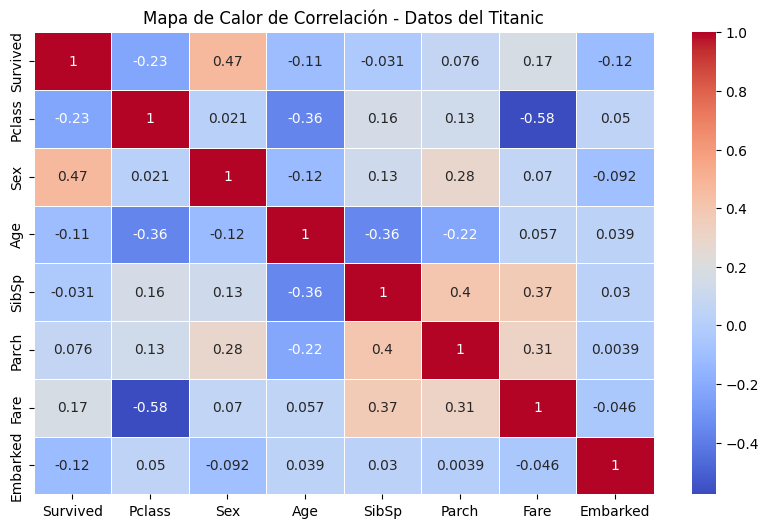

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación - Datos del Titanic') 
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 2 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  656 non-null    int64  
 1   Pclass    656 non-null    int64  
 2   Sex       656 non-null    int64  
 3   Age       656 non-null    float64
 4   SibSp     656 non-null    int64  
 5   Parch     656 non-null    int64  
 6   Fare      656 non-null    float64
 7   Embarked  656 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 46.1 KB


# Creacion del modelo de Arbol de Decisiones 


In [30]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
y = df['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [32]:
correlations = df.corr()['Survived'].abs().sort_values(ascending=False)
print(correlations)

Survived    1.000000
Sex         0.467867
Pclass      0.230258
Fare        0.173701
Embarked    0.117665
Age         0.112736
Parch       0.076172
SibSp       0.030823
Name: Survived, dtype: float64


In [33]:

tree=DecisionTreeClassifier(random_state=42)
arbol=tree.fit(X_train,y_train)


In [34]:

y_pred = arbol.predict(X_test)

## Prueba del modelo 

In [35]:
plt.figure(figsize=(100, 100))
plot_tree(arbol, feature_names=X.columns, filled=True, impurity=False, label='none', fontsize=10)

plt.show()

In [36]:
predicciones=arbol.predict(X_test)

In [37]:
predicciones

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [38]:
pd.crosstab(y_test, predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,74,14
1,15,29


## Reporte del modelo


In [39]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Reporte de Clasificacion:\n", report)
print("Matriz de Confusion:\n", conf_matrix)

Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        88
           1       0.67      0.66      0.67        44

    accuracy                           0.78       132
   macro avg       0.75      0.75      0.75       132
weighted avg       0.78      0.78      0.78       132

Matriz de Confusion:
 [[74 14]
 [15 29]]


### Matriz de Confusion

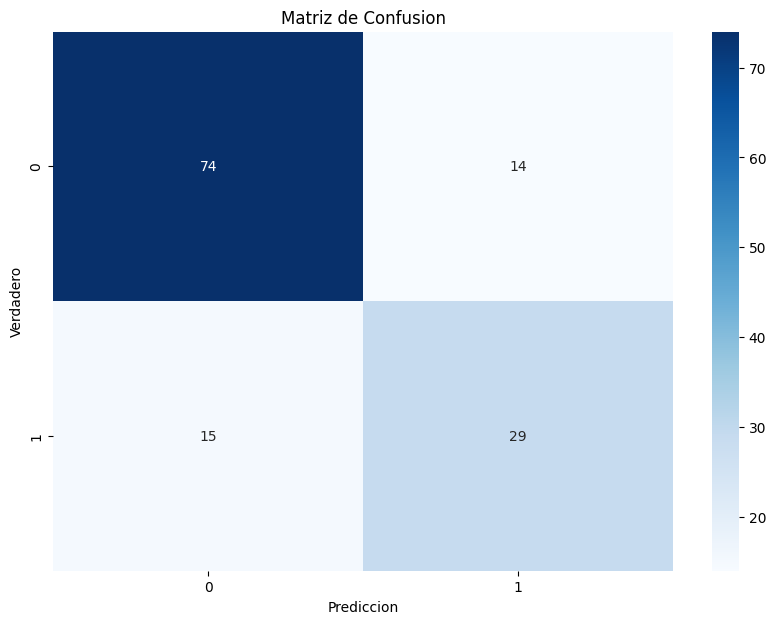

In [40]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')
plt.show()

# Conclusiones 
Análisis de Resultados de un Modelo de Clasificación para la Supervivencia en el Titanic
En el desarrollo de modelos de clasificación, una herramienta fundamental para evaluar el desempeño es la matriz de confusión. En este análisis, la matriz generada muestra cómo el modelo clasifica la supervivencia de los pasajeros del Titanic, representados por valores binarios (0 para no supervivientes y 1 para supervivientes). Cada fila de la matriz representa el valor real de la supervivencia, mientras que cada columna muestra las predicciones realizadas por el modelo. A partir de estos datos, es posible explorar el rendimiento del modelo, identificar patrones y sugerir mejoras.
La matriz de confusión obtenida muestra dos categorías: no supervivientes (0) y supervivientes (1). La diagonal principal de la matriz representa los casos en los que el modelo ha clasificado correctamente la supervivencia de los pasajeros, es decir, cuando el valor predicho coincide con el valor real. Los valores fuera de esta diagonal representan errores de clasificación.
Por ejemplo, el modelo acertó 96 veces en clasificar correctamente a los no supervivientes y 57 veces en clasificar correctamente a los supervivientes. Estas cifras indican que el modelo tiene un buen rendimiento en la clasificación de pasajeros que no sobrevivieron, lo cual sugiere que estas clases tienen características distintivas que el modelo puede aprender y reconocer con relativa facilidad.
Análisis de Errores de Clasificación
Sin embargo, existen varios errores de clasificación que merecen atención. Observamos que:
12 supervivientes fueron clasificados como no supervivientes: Este error puede deberse a que las características de algunos supervivientes son similares a las de los no supervivientes. En términos de supervivencia, esto podría implicar que los límites entre las características de los supervivientes y no supervivientes no están claramente definidos, lo cual genera confusión para el modelo.
20 no supervivientes fueron clasificados como supervivientes: Este error es significativo, ya que representa un cambio en la clasificación esperada. Esto podría indicar que el modelo no es suficientemente robusto para capturar todas las características de los no supervivientes, o que existen ciertas observaciones atípicas en el conjunto de datos.
Métricas de Desempeño: Precisión, Recall y F1-Score
Para analizar el desempeño del modelo de manera más exhaustiva, podemos calcular las métricas de precisión, recall y F1-score para cada clase. Estas métricas nos proporcionarán información adicional sobre cómo el modelo maneja cada categoría de supervivencia:

Precisión: La precisión de cada clase mide la proporción de predicciones correctas para esa clase específica. La clase de no supervivientes, con más aciertos en la diagonal principal, probablemente presente una precisión más alta en comparación con la clase de supervivientes.

Recall: El recall, o sensibilidad, muestra la capacidad del modelo para identificar correctamente cada clase. Si el modelo clasifica correctamente una alta proporción de no supervivientes, su recall será elevado para esa clase.

F1-Score: El F1-score es una combinación de precisión y recall, y proporciona una medida general del desempeño en cada clase, penalizando los errores y resaltando las clases en las que el modelo tiene dificultades.

Reflexiones Finales:
Importancia de la Limpieza de Datos: El preprocesamiento y la limpieza de datos son cruciales para asegurar que el modelo no enfrente problemas con valores faltantes o datos categóricos mal codificados.

Limitaciones del Modelo: Los modelos de árbol de decisiones, aunque útiles, tienen limitaciones, especialmente con datos con alta variabilidad y ruido. Modelos más complejos o características adicionales pueden mejorar las predicciones.

